# Fuerzas de ligadura | Péndulo rígido ideal

[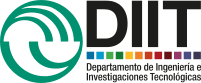](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2025 
[Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

# Enunciado 
Calcule la tensión de la cuerda con el método de multiplicadores de Lagrange.
La restricción es que la pesa se mantiene siempre en $\vec{r} = \ell \hat{\rho}$, ergo la función que expresa esto es $f(\rho) = \rho - \ell = 0$.

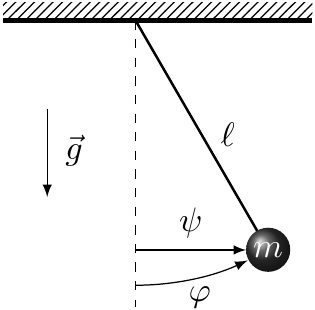

## Variables

In [1]:
import sympy as sm # importamos funciones de cálculo simbólico
from sympy.physics import mechanics as me # de sympy utilizaremos funciones de mecánica
me.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración

In [2]:
# Defino los parámetros físicos del sistema
m, g, l = sm.symbols('m, g, \ell', positive=True)
t = sm.symbols('t') # tiempo

# Defino coordenadas generalizadas 
fi, ro = me.dynamicsymbols('varphi, rho')
fi, ro

A diferencia de lo que hacíamos con el péndulo hasta ahora, aquí si utilizamos la coordenada radial $\rho$.

## Posición

In [3]:
# Sistema cartesiano
e = sm.physics.vector.ReferenceFrame('e') # marco referencial N en coordenadas cartesianas

# posición
pesa_r = ro* (sm.cos(fi)* (-e.y) + sm.sin(fi)* (e.x)) # recordemos que tomamos y hacia arriba

## Ligaduras

In [4]:
lambda1 = sm.symbols('lambda_1') # Tantos lambda como funciones de ligadura
f1 = sm.Eq(ro- l, 0)
f1

## Energía cinética

In [5]:
def energíaCinéticaTraslación(masa, posición, marcoDeReferencia):
    """
    A partir de la masa y posición de una partícula puntual en un marco de referencia devuelve su energía cinética.
    
    Parámetros
    ----------
    masa: (sympy.core.symbol.Symbol)
        De un partícula
    posición: (sympy.physics.vector.vector.Vector)
        del centro de masa de la partícula
    marcoDeReferencia: (sympy.physics.vector.frame.ReferenceFrame)
        En el que se expresa la posición
    
    Retorna
    -------
    Igualdad Sympy (sympy.core.relational.Equality)
        En su lado derecho explicita la energía cinética del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
        Energía cinética, T = (m/2) \dot{\vec{r}} \cdot\dot{\vec{r}}
    """
    velocidad = posición.dt(marcoDeReferencia)
    unMedio = sm.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
    T_traslación = sm.Eq(
        sm.Symbol('T_{traslación}'),
        unMedio* masa* velocidad.dot(velocidad)
        ).simplify()
    return T_traslación

In [6]:
# Energía cinética del sistema
pesa_T = energíaCinéticaTraslación(m, pesa_r, e)
T = pesa_T
T

## Energía potencial

In [7]:
def energíaPotencialGravitatoria(masa, posición, aceleracionGravitatoria):
    """
    Retorna la energía potencial gravitatoria de una partícula de masa m cuya posición r está dada en un sistema de referencia en el cual g es la aceleración gravitatoria terrestre.
    
    Parámetros
    ----------
    aceleracionGravitatoria: (sympy.physics.vector.vector.Vector)
        vector orientado según el sistema de referencia
    masa: (sympy.core.symbol.Symbol
        del cuerpo en cuestión
    posición: (sympy.core.symbol.Symbol)
        del centro de masa en un sistema de referencia relacionable con el de aceleracionGravitatoria
    
    Retorna
    -------
    Igualdad Sympy (sympy.core.relational.Equality)
        En su lado derecho explicita la energía potencial del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
    coordenadaGeneralizada: Símbolo Sympy (sympy.core.symbol.Symbol)
        V = - (m \vec{aceleracionGravitatoria}) \cdot{posición}
    """
    V_gravitatoria = sm.Eq(
        sm.Symbol('V_{gravitatoria}'),
        - (masa* aceleracionGravitatoria).dot(posición)
        ).simplify()
    return V_gravitatoria

In [8]:
# Energía potencial
g_vector = g* (-e.y) # aceleración gravitatoria en -y versor
pesa_V = energíaPotencialGravitatoria(m, pesa_r, g_vector)
V = pesa_V
V

## Lagrangiano y ecuaciones de Euler-Lagrange

$$
\boxed{
\frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial}{\partial \dot{q_i}} \mathcal{L} 
- \frac{\partial}{\partial q_i} \mathcal{L} 
= \sum_k \lambda_k(t) \frac{\partial}{\partial q_i} f_k
}
\quad
\left\{
  \begin{array}{l}
  i= 1,2,\dots,n \quad \text{coordenadas generalizadas} \\
  k= 1,2,\dots,p \quad \text{condiciones cinemáticas, de restricción o ligaduras}
  \end{array}
\right.
$$

### Las fuerzas generalizadas de ligadura

$$
Q_i = \sum_k \lambda_k(t) \frac{\partial}{\partial q_i} f_k .
$$

Existe una única función de ligadura que relaciona las coordenadas generalizadas del sistema, que es $f_1$, por tanto las dos $Q_i$ (una por cada coordenada generalizada), tendrán un solo término y un solo multiplicador de Lagrange $\lambda_1$.

In [9]:
fi_Q = lambda1* f1.lhs.diff(fi)
sm.Eq(sm.Symbol('Q_varphi'), fi_Q)

In [10]:
ro_Q = lambda1* f1.lhs.diff(ro)
sm.Eq(sm.Symbol('Q_rho'), ro_Q)

### Ecuaciones de Euler-Lagrange homogéneas

In [11]:
def eulerLagrange(T, V, coordenadaGeneralizada):
    '''    
    Esta función devuelve la ecuación de Euler-Lagrange para una coordenada generalizada a partir de las energías del sistema.
    
    Parámetros
    ----------
    T : Igualdad Sympy (sympy.core.relational.Equality)
        En su lado derecho explicita la energía cinética del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
    V : Igualdad Sympy (sympy.core.relational.Equality)
        En su lado derecho explicita la energía potencial del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
    coordenadaGeneralizada: Símbolo Sympy (sympy.core.symbol.Symbol)
        Para la que quiere obtenerse la ecuación de Euler-Lagrange
        
    Retorna
    -------
    Igualdad Sympy (sympy.core.relational.Equality)
        Ecuación de Euler-Lagrange homogénea para la coordenadaGeneralizada
    '''
    lagrangiano = (T.rhs - V.rhs).expand()
    t = sm.Symbol('t') # como se deriva respecto al tiempo con la función diff se declara t como símbolo 
    return sm.Eq(
        lagrangiano.diff(coordenadaGeneralizada.diff(t)).diff(t)
        - lagrangiano.diff(coordenadaGeneralizada) 
        , 0
    ).simplify()

In [25]:
fi_EL = eulerLagrange(T, V, fi)
fi_EL

In [13]:
ro_EL = eulerLagrange(T, V, ro)
ro_EL

### Ecuación de Euler-Lagrange con las fuerzas generalizadas

Juntando la ecuación homogénea de Euler-Lagrange, del lado izquierdo de la igualdad, con las expresiones de las fuerzas generalizadas, del lado derecho, se obtiene la ecuación que describe la dinámica para la correspondiente coordenada.

In [14]:
fi_EL = sm.Eq(fi_EL.lhs, fi_Q)
fi_EL

In [15]:
ro_EL = sm.Eq(ro_EL.lhs, ro_Q)
ro_EL

## Aplicación de la función de ligadura

En las ecuaciones de Euler-Lagrange, la coordenada radial, $\rho$, se sustituye por una longitud constante de la cuerda, $\ell$, si se la considera inextensible.

In [16]:
ro_f1 = sm.solve(f1.lhs, ro)[0]
sm.Eq(ro, ro_f1)

Y puesto que $\ell$ es constante, la derivada en el tiempo de la coordenada radial, $\dot{\rho}$ es nula.
Lo mismo sucede con la derivada segunda, $\ddot{\rho}$.

In [17]:
sm.Eq(f1.lhs.diff(t), 0)

In [18]:
sm.Eq(f1.lhs.diff(t,2), 0)

Se substituyen tales valores en las ecuaciones de Euler-Lagrange.

In [27]:
f1_subs = {
    ro : ro_f1,
    ro.diff(t): ro_f1.diff(t),
    ro.diff(t,2): ro_f1.diff(t,2)
}

In [28]:
fi_EL_subs = fi_EL.subs(f1_subs).simplify()
fi_EL_subs

In [29]:
rho_EL_subs = ro_EL.subs(f1_subs).simplify()
rho_EL_subs

De la primera se obtiene la ecuación de la dinámica para $\varphi$:

In [30]:
fi_pp = sm.solve(fi_EL_subs, fi.diff(t,2) )[0]
sm.Eq(fi.diff(t,2), fi_pp)

De la segunda se obtiene una función para $\lambda_1$

In [31]:
lambda1_función = sm.solve(rho_EL_subs, lambda1 )[0]
sm.Eq(lambda1, lambda1_función)

Como en este caso

$$
Q_\rho= \lambda_1(t) \frac{\partial}{\partial \rho} f_1 = \lambda_1(t),
$$
la expresión para la fuerza de ligadura que realiza la cuerda del péndulo, su tensión, es:

In [33]:
ro_Q = sm.Eq(sm.Symbol('Q_rho'), lambda1_función)
ro_Q

Es fácil comprobar esta que esta función da cuenta de la tensión para el péndulo en posición de reposo vertical.

In [34]:
vertical = {
  fi : 0,
  fi.diff(t) : 0,
}

In [35]:
ro_Q.subs(vertical).simplify()

Que es lo esperado, que la cuerda debe compensar el peso de la pesa. 